## 04 - Modelo de Clustering

En este notebook aplicaremos técnicas de clustering no supervisado con el objetivo de segmentar a los clientes en grupos con características similares. Utilizaremos como base los componentes principales obtenidos con PCA en el preprocesamiento, lo que nos permitirá trabajar con un conjunto de datos reducido y sin multicolinealidad.

Este análisis nos permitirá obtener una segmentación útil para futuras estrategias de marketing o personalización de servicios.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("../data/df_pca.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,3.351527,-1.838077,-1.257745,-2.818160,-0.146461,-0.479492,0.581306,0.682601,-0.111216,-0.390722,-0.528998,0.718924
1,-2.015412,0.182580,-1.706491,-0.701505,1.873419,0.668666,0.111911,0.968656,-1.480279,-0.157860,-0.784517,1.263460
2,1.504060,-0.525521,1.256210,-0.102850,0.547520,0.185420,-1.868648,-0.957531,1.480359,-0.069265,-0.479595,-0.041094
3,-2.556481,-1.291555,1.282873,0.706075,1.506140,-0.236378,0.566807,-1.414818,0.239660,0.109112,-0.601048,-0.539200
4,-0.178999,0.483061,0.984848,0.981495,-0.590794,0.625593,1.799908,0.789962,0.499627,-0.485393,0.612293,-0.512976


Empezaremos por determinar el número de clusters con el método del codo

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

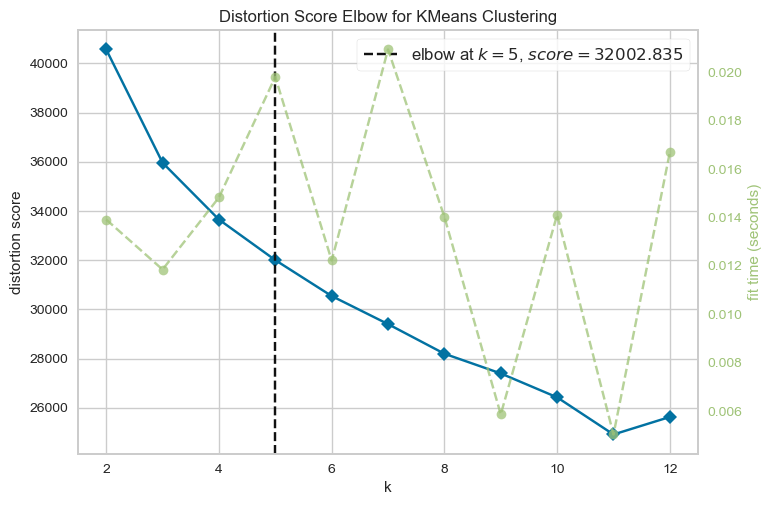

Número óptimo de clusters según Yellowbrick: 5


In [36]:
from yellowbrick.cluster import KElbowVisualizer

Elbow_M = KElbowVisualizer(KMeans(), k=12)
Elbow_M.fit(df)
Elbow_M.show()

k_optimo = Elbow_M .elbow_value_
print(f"Número óptimo de clusters según Yellowbrick: {k_optimo}")


Podemos observar como el número indicado de clusters es 5

### **Estrategia de Análisis de Clusters:**

Una vez hecho esto, vamos a seguir los siguientes pasos para finalizar la segmentación:


1. **Aplicar KMeans:** Se aplica el algoritmo **KMeans** sobre el dataset preprocesado con el número óptimo de clusters obtenido previamente (en este caso, **5**).

2. **Añadir etiquetas al dataset original:** Se toma el dataset original (sin escalar ni codificar) y se le añade una nueva columna con las etiquetas de cluster para interpretar los clusters de forma más comprensible.

3. **Analizar distribución de clientes por cluster:** Se visualiza la cantidad de clientes en cada segmento mediante un **countplot**.

4. **Visualización de los clusters:** Se realiza un **scatterplot** para representar gráficamente la agrupación, separando los clusters por colores.

5. **Análisis de características por cluster:**  Se utilizan **boxplots** (para variables numéricas) y **countplots** (para categóricas) para analizar cómo varían las características en cada grupo y identificamos patrones únicos y diferencias clave entre segmentos. También utilizaremos estadísticas básicas.

6. **Crear radarplot:** Se construye un gráfico **radar** con variables representativas para comparar visualmente los clusters. Intentaremos reducir a 5-8 variables idealmente.

7. **Extraer conclusiones finales:** Se describen los perfiles de cada cluster, destacando qué los hace únicos y se describen sus características.

### Vamos allà:

In [6]:
# Paso 1
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df)

In [7]:
# Paso 2
cleandf = pd.read_csv("../data/clean_dataset.csv")
cleandf["Cluster"] = clusters
cleandf.sample(5)

,Education,Marital_Status,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,...,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted,Cluster
1797,Graduate,Single,72282.0,70,0,63,345,0,0,1331,...,0.114951,22,0.227273,0.318182,0.409091,0.045455,1.913043,0.714286,1,2
1655,Undergraduate,Partnered,20193.0,18,0,23,578,0,1,82,...,0.109756,7,0.142857,0.142857,0.571429,0.142857,0.363322,0.250000,0,1
2005,Postgraduate,Partnered,32765.0,49,0,35,126,1,2,46,...,0.065217,8,0.250000,0.000000,0.500000,0.250000,1.904762,0.400000,0,3
1870,Postgraduate,Partnered,67546.0,90,0,26,667,0,1,2126,...,0.080903,20,0.200000,0.500000,0.250000,0.050000,0.899550,1.333333,0,0
1924,Postgraduate,Partnered,34529.0,94,0,38,653,1,2,162,...,0.253086,9,0.222222,0.222222,0.333333,0.222222,0.413476,0.285714,0,3


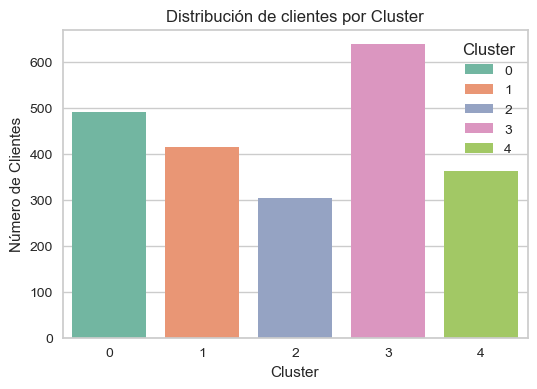

In [8]:
# Paso 3
plt.figure(figsize=(6,4))
sns.countplot(x=cleandf["Cluster"], hue = cleandf["Cluster"], palette="Set2")
plt.title("Distribución de clientes por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Número de Clientes")
plt.show()

Podemos observar como el cluster con mayor núemro de clientes es el 3, seguido por el 0, 1, 4 y finalmente el 2

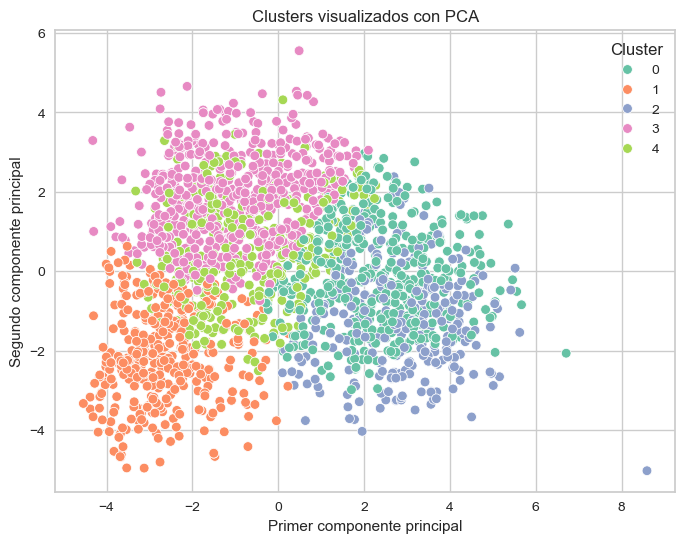

In [9]:
# Paso 4
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df)
df_pca = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Clusters visualizados con PCA')
plt.xlabel('Primer componente principal')
plt.ylabel('Segundo componente principal')
plt.show()

Aquí podemos ver el agrupamiento de los diferentes clusters con los dos primeros componentes principales, ya que es como lo tenemos más fácil para interpretarlo en un gráfico

In [10]:
cleandf

,Education,Marital_Status,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,...,Prop_Gold,Total_Purchases,Prop_Web_Purchases,Prop_Catalog_Purchases,Prop_Store_Purchases,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted,Cluster
0,Graduate,Single,58138.0,58,0,57,663,0,0,1617,...,0.054422,25,0.320000,0.400000,0.160000,0.120000,1.131222,1.142857,1,2
1,Graduate,Single,46344.0,38,0,60,113,2,2,27,...,0.222222,6,0.166667,0.166667,0.333333,0.333333,1.592920,0.200000,0,4
2,Graduate,Partnered,71613.0,26,0,49,312,0,1,776,...,0.054124,21,0.380952,0.095238,0.476190,0.047619,2.019231,2.000000,0,0
3,Graduate,Partnered,26646.0,26,0,30,139,1,2,53,...,0.094340,8,0.250000,0.000000,0.500000,0.250000,1.726619,0.333333,0,1
4,Postgraduate,Partnered,58293.0,94,0,33,161,1,2,422,...,0.035545,19,0.263158,0.157895,0.315789,0.263158,3.540373,1.000000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,Graduate,Partnered,61223.0,46,0,47,381,1,2,1341,...,0.184191,18,0.500000,0.166667,0.222222,0.111111,1.417323,1.800000,0,0
2208,Postgraduate,Partnered,64014.0,56,0,68,19,3,4,444,...,0.018018,22,0.363636,0.090909,0.227273,0.318182,22.000000,1.142857,1,3
2209,Graduate,Single,56981.0,91,0,33,155,0,0,1241,...,0.019339,19,0.105263,0.157895,0.684211,0.052632,3.677419,0.333333,1,2
2210,Postgraduate,Partnered,69245.0,8,0,58,156,1,2,843,...,0.072361,23,0.260870,0.217391,0.434783,0.086957,4.423077,2.000000,0,0


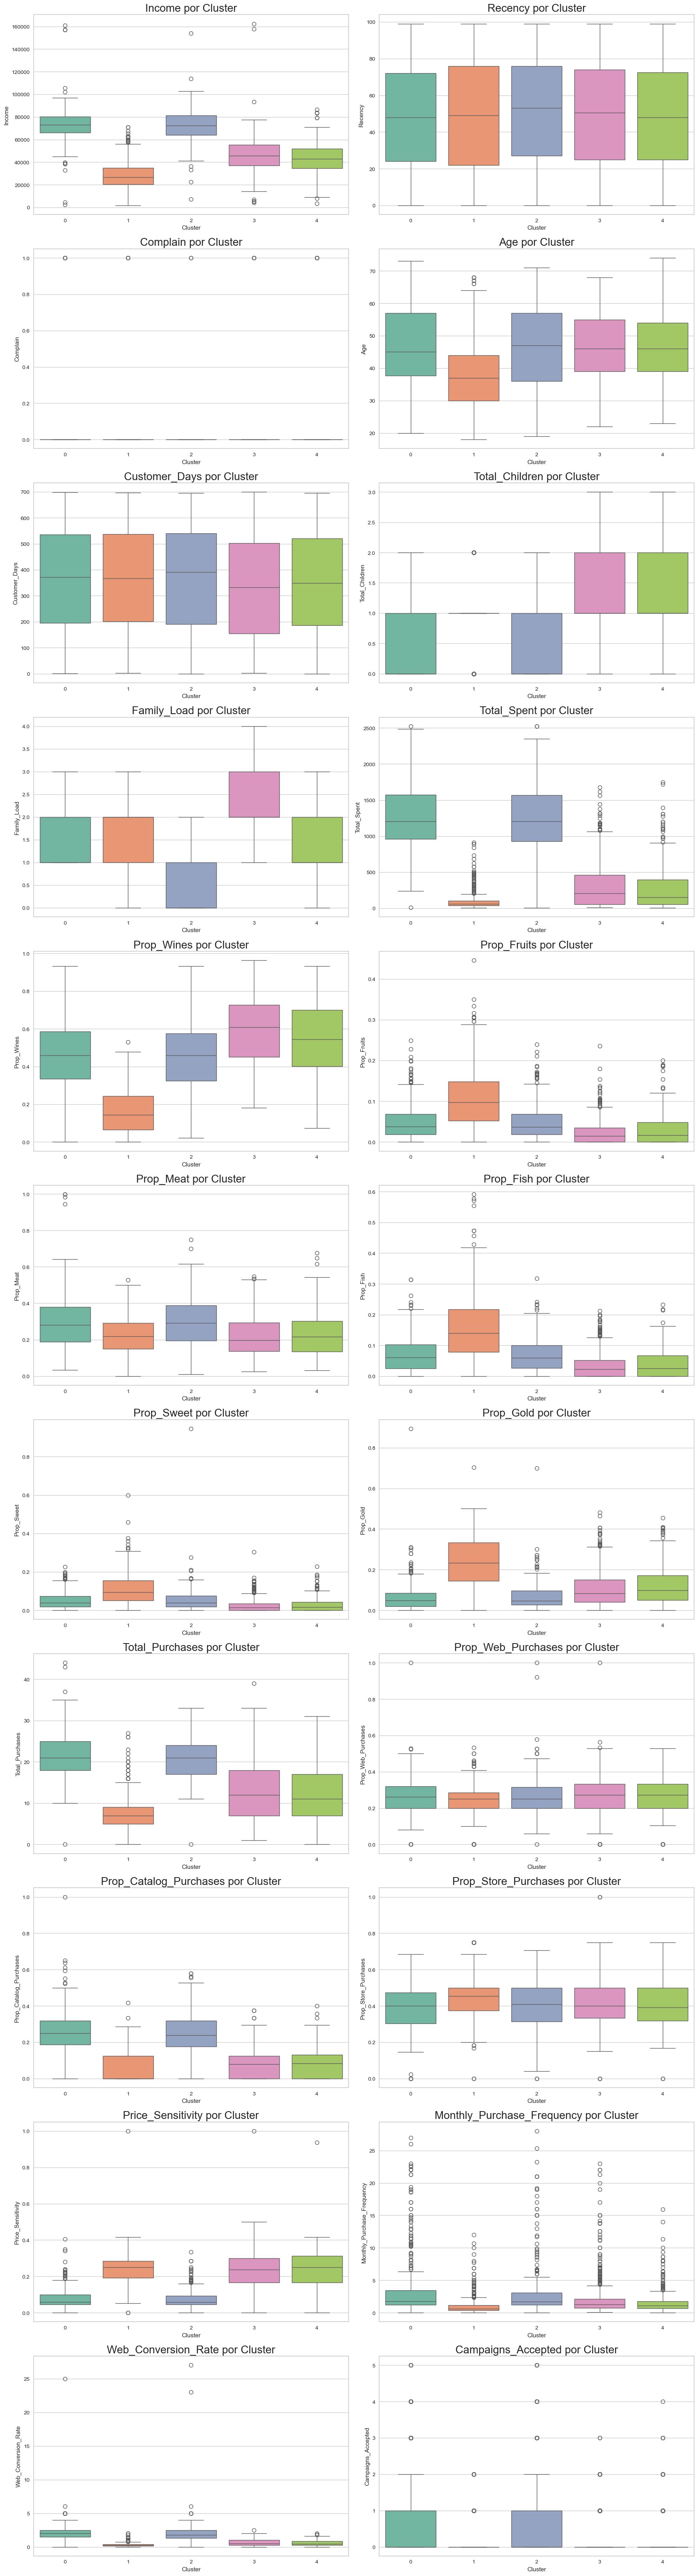

In [11]:
# Paso 5
num_cols = cleandf.select_dtypes(include="number").columns.drop("Cluster")

nrows = int(np.ceil(len(num_cols) / 2))
fig, ax = plt.subplots(nrows, 2, figsize=(18, nrows * 6))
ax = ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=cleandf["Cluster"], y=cleandf[col], ax=ax[i], hue = cleandf["Cluster"], palette="Set2", legend=False)
    ax[i].set_title(f'{col} por Cluster', fontsize=20)

# Oculta los ejes vacíos si los hay
for j in range(i+1, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()


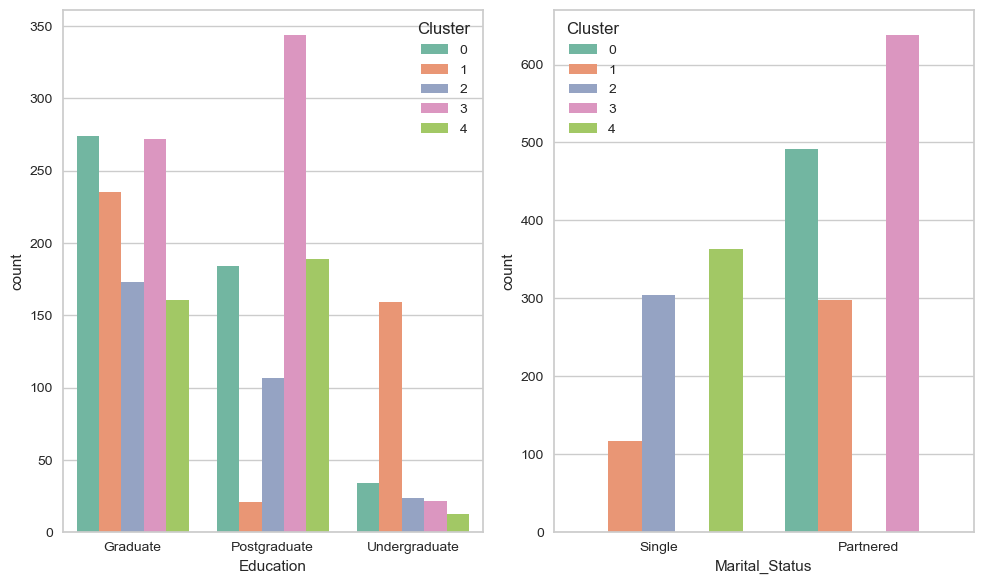

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.countplot(data=cleandf, x="Education", hue='Cluster', ax=ax[0], palette='Set2')
sns.countplot(data=cleandf, x="Marital_Status", hue='Cluster', ax=ax[1], palette='Set2')

plt.tight_layout()
plt.show()


In [13]:
cluster_profile_num = cleandf.groupby('Cluster').agg({
    **{col: ['mean', 'median', 'std'] for col in num_cols}
})
print(cluster_profile_num)

cluster_profile_cat = cleandf.groupby('Cluster').agg({
    'Education': lambda x: x.value_counts().index[0],  
    'Marital_Status': lambda x: x.value_counts().index[0] 
})
print(cluster_profile_cat)

               Income                           Recency                    \
                 mean   median           std       mean median        std   
Cluster                                                                     
0        72986.223577  72922.5  13783.291069  47.902439   48.0  28.915683   
1        28483.236145  26490.0  11987.923221  48.903614   49.0  29.791147   
2        72162.473684  72144.0  13814.617536  50.664474   53.0  29.034279   
3        46251.487461  45633.5  14460.271497  50.070533   50.5  28.658215   
4        43408.493113  42835.0  13210.621810  47.440771   48.0  28.428425   

         Complain                         Age  ... Price_Sensitivity  \
             mean median       std       mean  ...               std   
Cluster                                        ...                     
0        0.010163    0.0  0.100398  46.727642  ...          0.050853   
1        0.009639    0.0  0.097820  38.436145  ...          0.085098   
2        0.006579    0.

Para poder crear el radarplot, necesitamos escoger solo algunas de nuestras variables numéricas y tenerlas escaladas, cogeremos el datasete scalado del notebook anterior:

In [46]:
df_radar = pd.read_csv("../data/df_pre.csv")
df_radar["Cluster"] = clusters
df_radar.head()

,Income,Recency,Complain,Age,Customer_Days,Total_Children,Family_Load,Total_Spent,Prop_Wines,Prop_Fruits,...,Price_Sensitivity,Monthly_Purchase_Frequency,Web_Conversion_Rate,Campaigns_Accepted,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Partnered,Marital_Status_Single,Cluster
0,0.287105,0.310353,-0.09552,1.018352,1.527721,-1.264598,-1.758359,1.676245,-0.290121,0.088947,...,-0.541422,-0.361723,0.038734,0.617244,0.991895,-0.786220,-0.358569,-1.349603,1.349603,2
1,-0.260882,-0.380813,-0.09552,1.274785,-1.189011,1.404572,0.449070,-0.963297,-0.225781,-0.222814,...,1.377412,-0.225707,-0.687541,-0.502808,0.991895,-0.786220,-0.358569,-1.349603,1.349603,4
2,0.913196,-0.795514,-0.09552,0.334530,-0.206048,-1.264598,-0.654644,0.280110,0.393603,0.245369,...,-1.192455,-0.100116,0.698985,-0.502808,0.991895,-0.786220,-0.358569,0.740959,-0.740959,0
3,-1.176114,-0.795514,-0.09552,-1.289547,-1.060584,0.069987,0.449070,-0.920135,-1.100244,0.466436,...,0.627867,-0.186319,-0.584836,-0.502808,0.991895,-0.786220,-0.358569,0.740959,-0.740959,1
4,0.294307,1.554453,-0.09552,-1.033114,-0.951915,0.069987,0.449070,-0.307562,-0.214645,0.940298,...,0.746217,0.348013,-0.071308,-0.502808,-1.008171,1.271909,-0.358569,0.740959,-0.740959,3


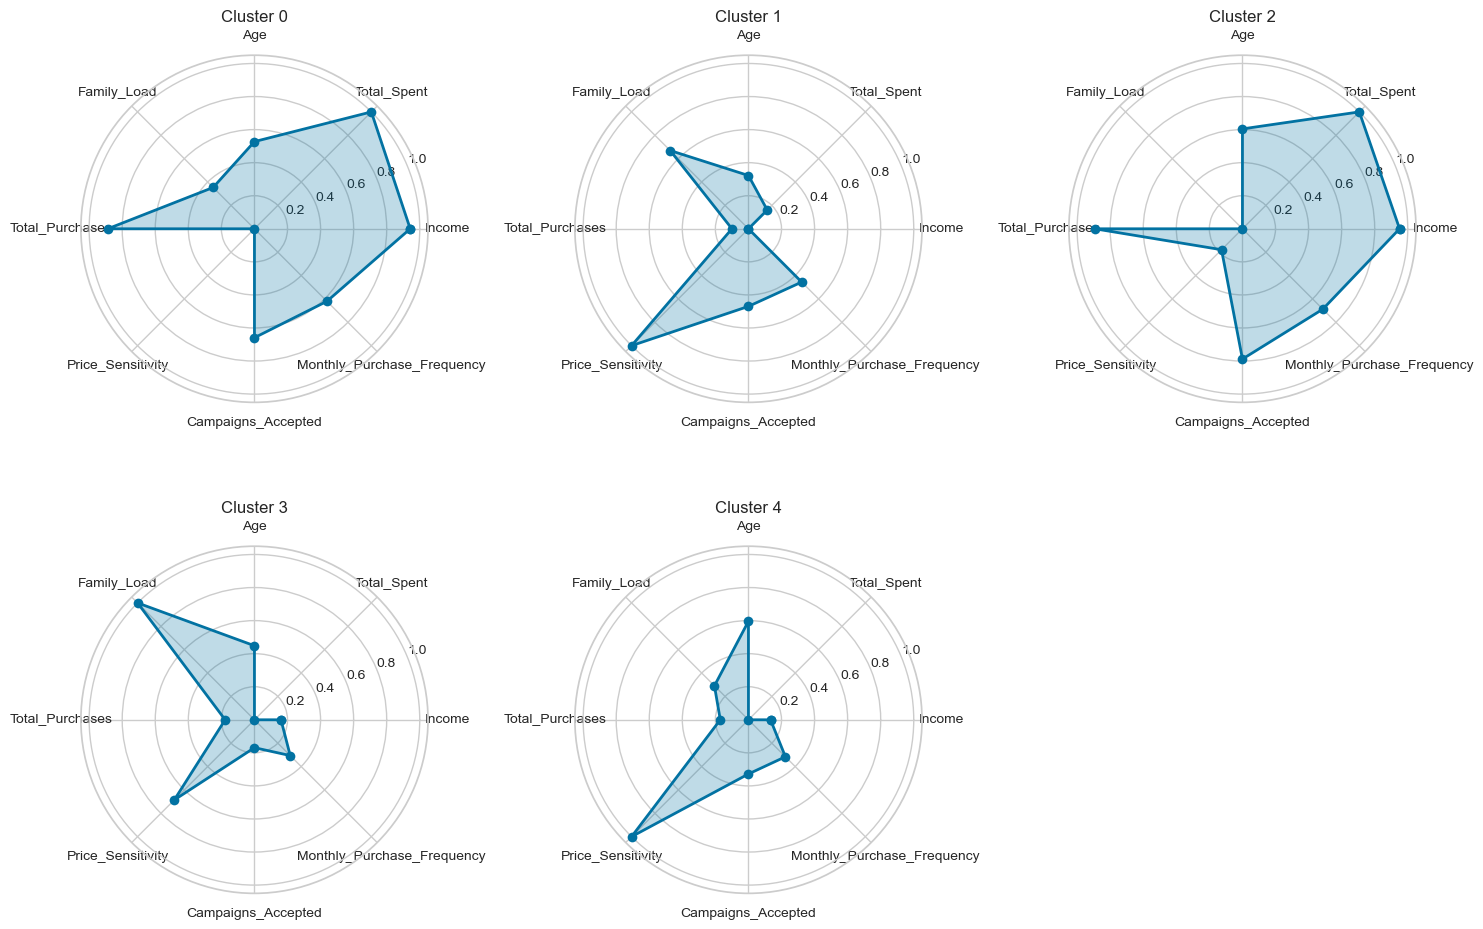

In [49]:
# Paso 6
# Haremos un radarplot con las variables más distinguibles y diferenciadas, paar entender bien el gráfico

def radar_chart(df, clusters, variables):
    plt.figure(figsize=(15, 10))
    
    for i, cluster in enumerate(clusters):
        plt.subplot(2, 3, i+1, polar=True)
        
        # Seleccionar datos del cluster
        cluster_data = df[df['Cluster'] == cluster]
        
        # Calcular promedios de las variables
        values = cluster_data[variables].mean().values
        
        # Normalizar valores
        values = (values - values.min()) / (values.max() - values.min())
        
        # Preparar ángulos
        angles = np.linspace(0, 2*np.pi, len(variables), endpoint=False)
        values = np.concatenate((values, [values[0]]))
        angles = np.concatenate((angles, [angles[0]]))
        
        # Graficar
        plt.polar(angles, values, 'o-', linewidth=2)
        plt.fill(angles, values, alpha=0.25)
        plt.xticks(angles[:-1], variables)
        plt.title(f'Cluster {cluster}')
    
    plt.tight_layout()
    plt.show()

# Variables para radar
radar_vars = ['Income', 'Total_Spent', 'Age', 'Family_Load', 'Total_Purchases', 'Price_Sensitivity', 'Campaigns_Accepted', 'Monthly_Purchase_Frequency']
radar_chart(df_radar, range(5), radar_vars)

In [52]:
df_radar = df_radar[['Income', 'Total_Spent', 'Age', 'Family_Load', 'Total_Purchases', 'Price_Sensitivity', 'Campaigns_Accepted', 'Monthly_Purchase_Frequency', 'Cluster']]

# Calculamos la media de cada variable por cluster
radar_avg = df_radar.groupby('Cluster').mean()

# Creamos la figura
fig = go.Figure()

# Añadimos una traza por cada cluster
for cluster in radar_avg.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_avg.loc[cluster],
        theta=radar_avg.columns,
        fill='toself',
        name=f'Segmento {cluster}'
    ))

# Configuramos el layout del gráfico
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[-2, 2]  # ajuste si es necesario según los valores escalados
        )),
    showlegend=True,
    title='Comparativa de Clusters - Radar Plot'
)

fig.show()

Ya tenemos todos los datos y las visualziaciones creadas, podemos pasar al último paso, las conclusiones y carcterísticas de cada cluster: 

### **Conclusiones Finales del Análisis de Clusters**  
El análisis de segmentación ha revelado cinco grupos claramente diferenciados, lo que permite a la empresa adoptar estrategias de marketing más personalizadas y eficaces:

🔸 **Cluster 0: Parejas con Alto Poder Adquisitivo y Compromiso Comercial**  
Este grupo destaca por su elevado nivel de ingresos, alto gasto mensual y fuerte involucramiento con campañas de marketing. Aunque no les interesan los descuentos, participan activamente en promociones y tienen una tasa de conversión elevada. Representan un público ideal para estrategias premium, fidelización y programas exclusivos.  
**Estrategia recomendada**: Ofertas VIP, contenido exclusivo, y experiencias personalizadas de marca.

🔸 **Cluster 1: Jóvenes con Bajos Ingresos y Alta Sensibilidad al Precio**  
Compuesto por los clientes más jóvenes y con menor poder adquisitivo. Tienen un consumo muy limitado, dependen de descuentos y presentan una escasa participación en campañas. Son un segmento difícil de rentabilizar, pero clave para captar volumen si se ajustan los precios o se implementan promociones dirigidas.  
**Estrategia recomendada**: Descuentos agresivos, cupones, campañas orientadas a productos accesibles o básicos.

🔸 **Cluster 2: Solteros Profesionales de Alto Nivel y Alta Receptividad**  
Clientes con altos ingresos, educación superior y sin cargas familiares. Son el grupo más receptivo a campañas y muestran un comportamiento de compra intensivo. Presentan también una elevada tasa de conversión en canales digitales.  
**Estrategia recomendada**: Marketing digital directo, campañas de fidelización y programas de membresía premium.

🔸 **Cluster 3: Familias Estables de Clase Media con Gasto Controlado**  
Formado por parejas con hijos y nivel educativo alto. Aunque sus ingresos son moderados, su gasto es cuidadoso y aprovechan activamente los descuentos. No participan en campañas, lo que indica una baja sensibilidad al marketing tradicional.  
**Estrategia recomendada**: Packs familiares, descuentos por volumen, y promociones orientadas al ahorro familiar.

🔸 **Cluster 4: Solteros con Hijos y Estabilidad Económica Moderada**  
Este grupo tiene ingresos medios y una actitud mixta: utilizan descuentos con frecuencia, pero muestran baja participación en campañas. Su comportamiento de compra es regular, aunque más contenido.  
**Estrategia recomendada**: Ofertas prácticas, descuentos personalizados, y beneficios por recurrencia o fidelidad.